In [2]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print (itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [43]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words [:]:
    
    # print (w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi [ch]
        X.append (context)
        Y.append (ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append       

X = torch.tensor(X)
Y = torch.tensor(Y)

In [44]:
X.shape,X.dtype,  Y.shape, Y.dtype #type:ignore

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
C = torch.randn((27, 2))

In [9]:
# C[5]

In [10]:
# F.one_hot(torch.tensor(5), num_classes=27).float() @ C

In [11]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [12]:
W1= torch.randn((6, 100))
b1 = torch.randn(100)

In [13]:
torch.cat([emb[:,0,:],emb[:,1,:], emb[:,2,:]], 1)

tensor([[-0.0119,  1.0417, -0.0119,  1.0417, -0.0119,  1.0417],
        [-0.0119,  1.0417, -0.0119,  1.0417,  0.1030,  1.7751],
        [-0.0119,  1.0417,  0.1030,  1.7751, -0.6506,  0.5421],
        [ 0.1030,  1.7751, -0.6506,  0.5421, -0.6506,  0.5421],
        [-0.6506,  0.5421, -0.6506,  0.5421, -0.8046, -0.6562],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.0119,  1.0417],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.2906,  1.1879],
        [-0.0119,  1.0417, -0.2906,  1.1879, -1.0173, -1.5766],
        [-0.2906,  1.1879, -1.0173, -1.5766,  0.3018, -0.1744],
        [-1.0173, -1.5766,  0.3018, -0.1744,  0.8310, -1.1098],
        [ 0.3018, -0.1744,  0.8310, -1.1098,  0.3018, -0.1744],
        [ 0.8310, -1.1098,  0.3018, -0.1744, -0.8046, -0.6562],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.0119,  1.0417],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.8046, -0.6562],
        [-0.0119,  1.0417, -0.8046, -0.6562,  0.8310, -1.1098],
        [-0.8046, -0.6562,  0.8310, -1.1

In [14]:
torch.cat(torch.unbind(emb, 1),1).shape

torch.Size([32, 6])

In [15]:
# h = emb.view(-1, 6) @ W1 + b1

In [16]:
a =  torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [17]:
a.shape

torch.Size([18])

In [18]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [19]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [20]:
emb.shape

torch.Size([32, 3, 2])

In [21]:
emb.view(32, 6)
# emb.view(32, 6) == torch.cat(torch.unbind(emb, 1),1).shape

tensor([[-0.0119,  1.0417, -0.0119,  1.0417, -0.0119,  1.0417],
        [-0.0119,  1.0417, -0.0119,  1.0417,  0.1030,  1.7751],
        [-0.0119,  1.0417,  0.1030,  1.7751, -0.6506,  0.5421],
        [ 0.1030,  1.7751, -0.6506,  0.5421, -0.6506,  0.5421],
        [-0.6506,  0.5421, -0.6506,  0.5421, -0.8046, -0.6562],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.0119,  1.0417],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.2906,  1.1879],
        [-0.0119,  1.0417, -0.2906,  1.1879, -1.0173, -1.5766],
        [-0.2906,  1.1879, -1.0173, -1.5766,  0.3018, -0.1744],
        [-1.0173, -1.5766,  0.3018, -0.1744,  0.8310, -1.1098],
        [ 0.3018, -0.1744,  0.8310, -1.1098,  0.3018, -0.1744],
        [ 0.8310, -1.1098,  0.3018, -0.1744, -0.8046, -0.6562],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.0119,  1.0417],
        [-0.0119,  1.0417, -0.0119,  1.0417, -0.8046, -0.6562],
        [-0.0119,  1.0417, -0.8046, -0.6562,  0.8310, -1.1098],
        [-0.8046, -0.6562,  0.8310, -1.1

In [22]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [23]:
h

tensor([[ 0.6230,  0.9996, -1.0000,  ..., -0.4774,  0.2802, -0.6070],
        [ 0.2004,  0.9999, -1.0000,  ..., -0.8333,  0.8044, -0.8251],
        [ 0.1467,  0.9996, -1.0000,  ...,  0.4870, -0.7038, -0.6544],
        ...,
        [ 0.9904,  0.9954,  0.8210,  ...,  0.6371, -0.2496,  0.9034],
        [-0.6866, -0.5912, -0.1548,  ..., -0.7659,  0.4306, -0.9392],
        [ 0.9902,  0.9866, -0.9879,  ...,  0.9601, -0.9923,  0.9820]])

In [24]:
h.shape

torch.Size([32, 100])

In [25]:
(emb.view(-1, 6) @ W1).shape

torch.Size([32, 100])

In [26]:
b1.shape

torch.Size([100])

In [27]:
# 32 , 100
#  1 , 100

In [28]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [29]:
logits = h @ W2 + b2

In [30]:
logits.shape

torch.Size([32, 27])

In [31]:
counts = logits.exp()

In [32]:
prob  = counts/ counts.sum(1, keepdim=True)

In [33]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.9858)

In [34]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [35]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

--------- Now Made Respectable :) ------------

In [61]:
X.shape, Y.shape  #dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [106]:
# build the dataset

def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words [:]:
        
        # print (w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi [ch]
            X.append (context)
            Y.append (ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append       

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [107]:
len(words)

32033

In [108]:
n1

25626

In [109]:
n2

28829

In [110]:
n2 - n1

3203

In [111]:
len(words) - n2

3204

In [119]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [164]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch. randn( (27, 2), generator=g)
W1 = torch. randn((6, 300), generator=g)
b1 = torch. rand (300, generator=g)
W2 = torch. randn( (300, 27), generator=g)
b2 = torch. rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [165]:
sum(p.nelement() for p in parameters)

10281

In [166]:
for p in parameters:
    p.requires_grad = True

In [167]:
lre = torch.linspace(-3, 0, 1000)
lrs  = 10 **lre

In [168]:
lri = []
lossi = []
stepi = []

for i in range(30000):

    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass 
    emb = C [Xtr[ix]] # (32, 3, 2)
    h = torch. tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -torch.tensor(lr) * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

#print(loss.item())

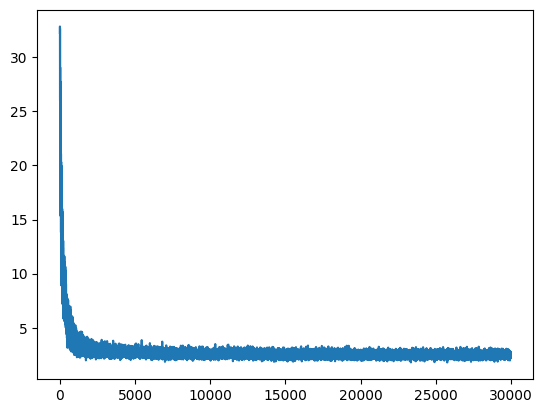

In [169]:
plt.plot(stepi, lossi)

In [133]:
print(loss.item())

2.471529960632324


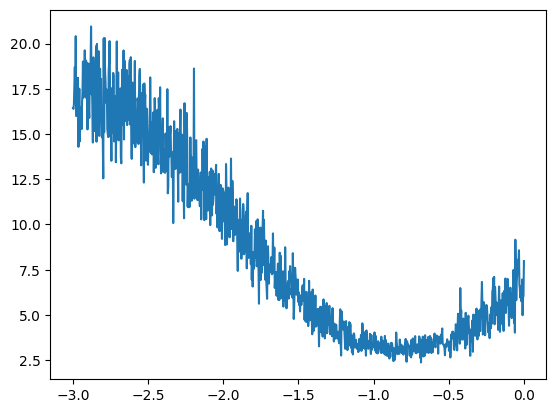

In [85]:
plt.plot(lri, lossi)

In [160]:
emb = C[Xtr] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)   # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2279, grad_fn=<NllLossBackward0>)

In [161]:
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)   # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2290, grad_fn=<NllLossBackward0>)

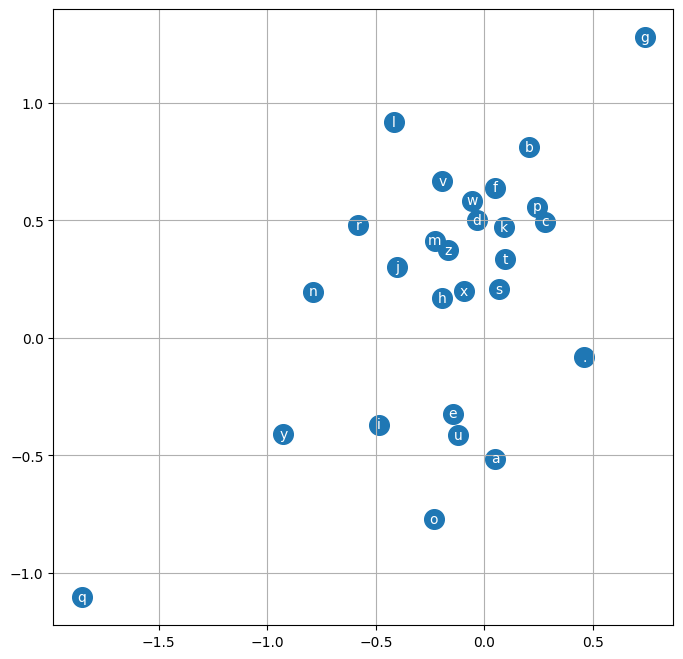

In [163]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], va="center", ha="center", color="white")
plt.grid('minor')

In [41]:
logits.max(1)

torch.return_types.max(
values=tensor([12.8570, 15.2782, 18.0707, 19.8688, 16.5893, 12.8570, 17.0453, 15.6529,
        16.9717, 18.9867, 16.1031, 15.3543, 12.8570, 17.1609, 12.4340, 16.0421,
        12.8570, 16.9594, 15.9623, 13.1808, 12.0324, 16.5974, 18.4181, 17.4922,
        15.6558, 12.8570, 15.9989, 15.2950, 19.5290, 16.5407, 15.0322, 15.0557],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [109]:
# logits = torch.tensor([-2, -3, 0 ,5]) - 3
# counts = logits.exp()
# probs = counts/ counts.sum()
# probs

In [52]:
torch.randint(0, X.shape[0], (32, ))

tensor([179114, 198105,  60357, 167519, 191938,  47663, 182584, 218022, 209302,
        113028, 144911,  57098,  92530, 128698,   8314, 132683, 134851, 116106,
         58182,  59658, 190068,  89856,   9268, 180449, 141945, 225488, 213328,
        106923, 151734, 117271, 117632, 150072])

In [ ]:
#training split, dev/validation split, test split
# 80%, 10%, 10%